<a href="https://colab.research.google.com/github/anushkakakkar/git-1-2-3/blob/main/Prediction_Using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION # GRIPAPRIL22
# AUTHOR: ANUSHKA KAKKAR

TASK 2: Prediction Using Unsupervised ML (From the given ‘Iris’ dataset, predict the optimum number of clusters and representing it visually)

DATASET: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

STEP 1: First, we will import all the required libraries

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

# DATA PREPROCESSING

STEP 2: LOADING THE IRIS DATASET

In [2]:
from google.colab import files
files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [4]:
df = pd.read_csv('Iris.csv')
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [5]:
df.head() #returns first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail() #returns last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.sample(5) #To get five random rows back

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
32,33,5.2,4.1,1.5,0.1,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
126,127,6.2,2.8,4.8,1.8,Iris-virginica


In [8]:
df.shape

(150, 6)

In [9]:
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


This shows some descriptive statistics on the data set. It only shows the statistics on the numerical columns. From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

-The mean, or average.

-50% aka Median it is very import to understand Skeweness of the Data.

-The standard deviation, or how spread out the data is.

-The minimum and maximum value of each column

-The number of items that fall within the first, second, and third percentiles.

# Finding any null values

In [12]:
null = df.isnull()
print(null)
null_count = null.count()
null_count

        Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[150 rows x 6 columns]


Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

There are no null values in the iris dataset.

# Data Visualisation

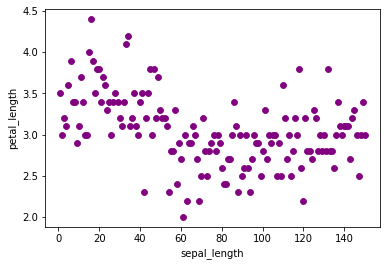

In [14]:
x=df.iloc[:,0]
y=df.iloc[:,2]
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.scatter(x,y,color='Purple',linewidths=0.8)
plt.show()

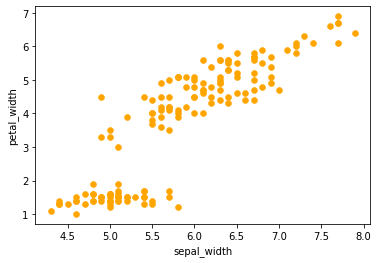

In [15]:
x=df.iloc[:,1]
y=df.iloc[:,3]
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.scatter(x,y,color='Orange',linewidths=0.5)
plt.show()

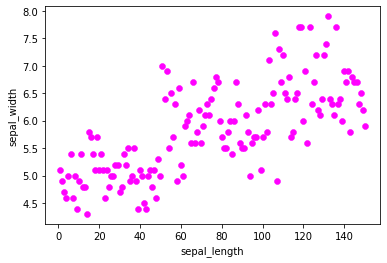

In [16]:
x=df.iloc[:,0]
y=df.iloc[:,1]
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.scatter(x, y, color='Magenta',linewidths=0.5)
plt.show()

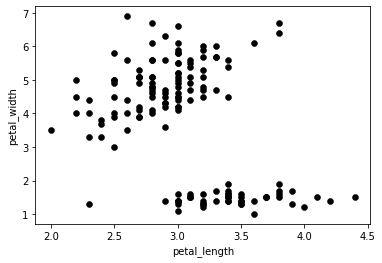

In [17]:
x=df.iloc[:,2]
y=df.iloc[:,3]
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(x, y, color='Black',linewidths=0.5)
plt.show()

# AS WE HAVE CLASSIFIED OUR DATA, NOW WE HAVE TO FIND THE OPTIMUM NUMBER OF CLUSTERS FOR K-MEANS CLASSIFICATION

In [18]:
#cluster classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    Kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    Kmeans.fit(x)
    wcss.append(Kmeans.inertia_)

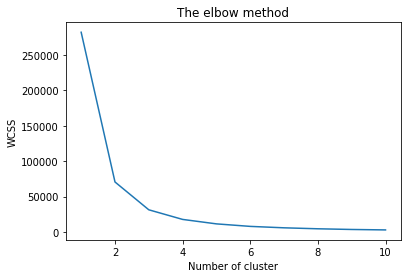

In [19]:
#plotting the result onto a line graph, allowing us to observe the elbow .

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS') 
plt.show()

WCSS : Within cluster sum of squares

We can clearly see why it is called'The Elbow Method' fron above graph, the optimum cluster is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of cluster as 3''.

# PREDICTION

In [20]:
#Applying Kmeans to the dataset 

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(x) 

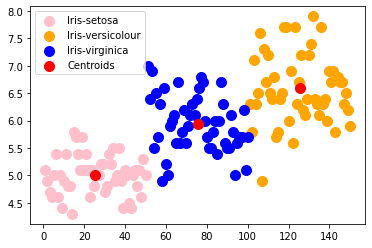

In [23]:
#Visualising the cluster - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'Pink', label = 'Iris-setosa')

plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'Orange', label = 'Iris-versicolour')

plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'Blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 100, c = 'Red', label = 'Centroids')

plt.legend()

This shows the clusters present in the given dataset among species setosa, versicolour, virginica.

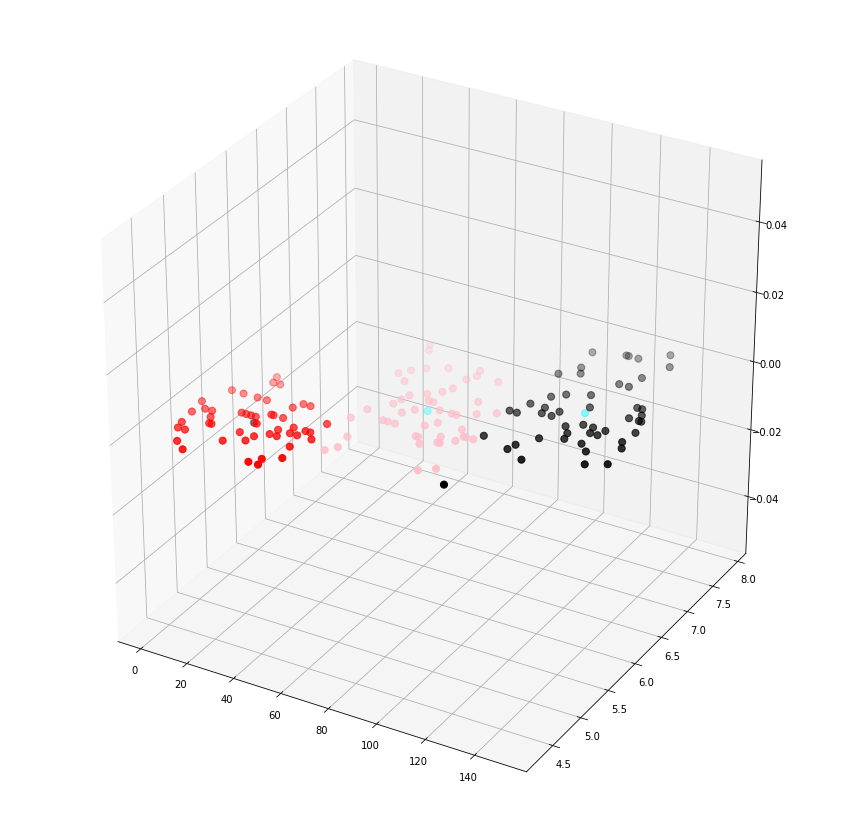

In [25]:
# 3d scatterplot
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'Red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'Black', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'Pink', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'cyan', label = 'Centroids')
plt.show()